In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("C:\\Users\\kirte\\Downloads\\archive\\Heart.csv")
data.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [2]:
data.shape

(303, 15)

In [3]:
data.size

4545

In [4]:
data.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [6]:
data.notnull().sum()

Unnamed: 0    303
Age           303
Sex           303
ChestPain     303
RestBP        303
Chol          303
Fbs           303
RestECG       303
MaxHR         303
ExAng         303
Oldpeak       303
Slope         303
Ca            299
Thal          301
AHD           303
dtype: int64

In [7]:
print(data["Age"].mean())

54.43894389438944


In [8]:
from sklearn.model_selection import train_test_split

X = data[["ChestPain", "Age", "Sex", "RestBP", "Chol"]]
Y = data[["RestBP", "Chol"]]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=10
)
X_train

,ChestPain,Age,Sex,RestBP,Chol
280,asymptomatic,57,1,110,335
235,asymptomatic,54,1,122,286
260,nonanginal,44,0,118,242
76,asymptomatic,60,1,125,258
275,typical,64,1,170,227
...,...,...,...,...,...
156,asymptomatic,51,1,140,299
123,asymptomatic,55,1,140,217
15,nonanginal,57,1,150,168
125,nontypical,45,0,130,234


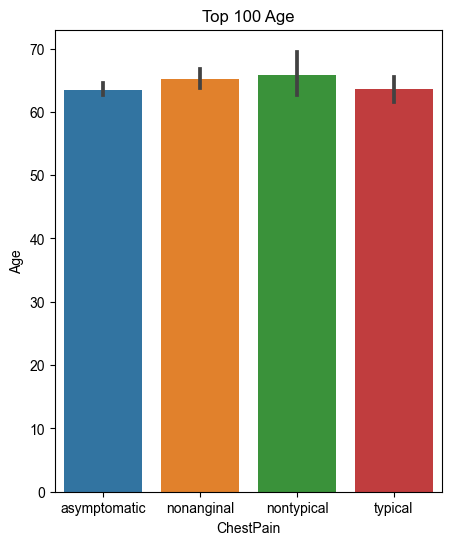

In [9]:
import seaborn as sns

top_10_data = data.nlargest(100, "Age")
plt.figure(figsize=(5, 6))
plt.title("Top 100 Age")
sns.barplot(x=top_10_data.ChestPain, y=top_10_data.Age)

sns.set_style("whitegrid")

In [10]:
import plotly.express as px
import pandas as pd  # Importing pandas to create a sample dataframe

# Assuming 'data' is a pandas DataFrame with relevant columns
data = pd.DataFrame(
    {
        "Age": [25, 30, 35, 40, 45],
        "RestBP": [120, 130, 125, 140, 135],
        "Chol": [200, 210, 190, 220, 230],
        "ChestPain": ["Mild", "Severe", "Mild", "Moderate", "Severe"],
    }
)

# Creating the scatter plot using plotly
fig = px.scatter(
    data,
    x="Age",
    y="RestBP",
    size="Chol",
    color="ChestPain",
    hover_name="Age",
    log_x=True,
    size_max=60,
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed